# Titanic: Machine Learning from Disaster
## Bibliotecas utilizadas

In [1]:
from numbers import Number

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels import __version__ as stmodversion
import pandas as pd
from sklearn import tree
from sklearn import __version__ as skversion
from sklearn.linear_model import LinearRegression
import pandas_profiling

%matplotlib inline

## Lendo o arquivo e exibindo suas extremidades

In [2]:
csv_train = pd.read_csv('datasets/train.csv')
csv_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
csv_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
csv_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Criando um novo dataframe
Esse novo dataframe terá apenas as colunas úteis para modelagem. Serão removidos o nome e o número do ticket, PassengerId será colocado como índice e as variáveis Sex e Embarked serão transformadas em dummy

In [5]:
train = csv_train.copy()  # Cria uma cópia do dataframe
train.set_index('PassengerId', inplace=True)  # Define PassengerId como novo índice das linhas
dummies = pd.get_dummies(train.loc[:, ['Sex', 'Embarked']])  # transforma Sex e Embarked em variáveis dummy
train = pd.concat([train, dummies], axis=1)  # Concatena train e dummies
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)  # Remove colunas inúteis

## Preenchendo os valores missing de idade

In [6]:
X = train.loc[train.Age.notnull(), :].copy()
Y = X.Age
X.drop(['Cabin', 'Age'], axis=1, inplace=True)

linreg = LinearRegression()
linreg.fit(X, Y)


X2 = train.loc[train.Age.isnull(),:].copy()
X2.drop(['Cabin', 'Age'], axis=1, inplace=True)
s = pd.Series(linreg.predict(X2))
s.index = train.Age[train.Age.isnull()].index
train.Age.fillna(value=s, inplace=True)
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.395671,0.523008,0.381594,32.204208,0.352413,0.647587,0.188552,0.086420,0.722783
std,0.486592,0.836071,13.706897,1.102743,0.806057,49.693429,0.477990,0.477990,0.391372,0.281141,0.447876
min,0.000000,1.000000,-5.677871,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,36.362299,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


# Criando a variável cabin_type
O número da cabine, por si só, não é uma informação muito útil. Porém a letra inicial da cabine pode ser um indicativo da localização da mesma e isso pode indicar o 'status' do passageiro que ocupa aquela cabine. Dessa forma vamos isolar a primeira letra da cabine e chamá-la de CabinType

In [7]:
def gera_CabinType(cabin):
    if isinstance(cabin, Number):
        return 'X'
    elif ' ' in cabin:  # Mais de uma cabine
        cabins = cabin.split()  # Separa todas as cabines em uma lista
        cabins = [c[0] for c in cabins]  # Pega o primeiro caractere de cada cabine
        return ''.join(set(cabins))  # Remove duplicatas e junta todos os CabinTypes
    else:
        return cabin[0]

cabin_types = train['Cabin'].apply(gera_CabinType)
cabin_types.name = 'Cabin_Type'
train = pd.concat([train, cabin_types], axis=1)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Cabin_Type
PassengerId,,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,NaN,0,1,0,0,1,X
2,1,1,38.0,1,0,71.2833,C85,1,0,1,0,0,C
3,1,3,26.0,0,0,7.9250,NaN,1,0,0,0,1,X
4,1,1,35.0,1,0,53.1000,C123,1,0,0,0,1,C
5,0,3,35.0,0,0,8.0500,NaN,0,1,0,0,1,X


## Analisando valores missing em Cabin
Comparando o preço e a classe dos passageiros sem número de cabine (ou com CabinType 'X')

In [8]:
def gera_preços(df):
    return pd.DataFrame({'Valor mínimo': df.Fare.min(),
            'Valor médio': df.Fare.mean(),
            'Valor máximo': df.Fare.max(),
            }, index=[len(df.Fare)])

train.groupby('Cabin_Type').apply(func=gera_preços)

,,Valor máximo,Valor médio,Valor mínimo
Cabin_Type,,,,
A,15,81.8583,39.623887,0.0000
B,47,512.3292,113.505764,0.0000
C,59,263.0000,100.151341,26.5500
D,33,113.2750,57.244576,12.8750
E,32,134.5000,46.026694,8.0500
F,9,39.0000,21.972222,7.7500
FE,1,22.3583,22.358300,22.3583
FG,3,7.6500,7.650000,7.6500
G,4,16.7000,13.581250,10.4625


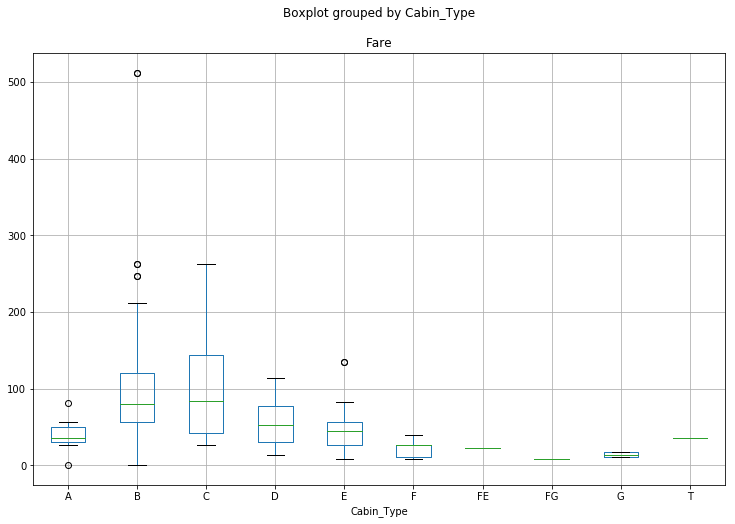

In [9]:
com_cabine = train.loc[train.Cabin.notnull(), :]
com_cabine.boxplot('Fare', by='Cabin_Type', figsize=(12, 8))

**É possível ver que há evidências de uma relação entre CabinType e Fare. Vou testar isso com uma ANOVA**

In [10]:
mod = ols('Fare ~ Cabin_Type', data=com_cabine).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                   sum_sq     df         F    PR(>F)
Cabin_Type  221117.561353    9.0  5.282336  0.000002
Residual    902311.304144  194.0       NaN       NaN


Há uma diferença significativa das médias de ```Fare``` para os diversos grupos de ```CabinType```. Dessa forma é possível gerar um modelo que encontre o ```CabinType``` em função do ```Fare```

## Prevendo o tipo de cabine

In [11]:
X = com_cabine.drop(['Cabin_Type', 'Cabin'], axis=1)
y = com_cabine.Cabin_Type.copy()

dtc = tree.DecisionTreeClassifier()
dtc.fit(X, y)

train.Cabin_Type = dtc.predict(train.drop(['Cabin_Type', 'Cabin'], axis=1))
train

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Cabin_Type
PassengerId,,,,,,,,,,,,,
1,0,3,22.000000,1,0,7.2500,NaN,0,1,0,0,1,FG
2,1,1,38.000000,1,0,71.2833,C85,1,0,1,0,0,C
3,1,3,26.000000,0,0,7.9250,NaN,1,0,0,0,1,E
4,1,1,35.000000,1,0,53.1000,C123,1,0,0,0,1,C
5,0,3,35.000000,0,0,8.0500,NaN,0,1,0,0,1,E
6,0,3,31.693684,0,0,8.4583,NaN,0,1,0,1,0,E
7,0,1,54.000000,0,0,51.8625,E46,0,1,0,0,1,E
8,0,3,2.000000,3,1,21.0750,NaN,0,1,0,0,1,FE
9,1,3,27.000000,0,2,11.1333,NaN,1,0,0,0,1,E


## Análise da base final utilizando pandas_profiling

In [12]:
pandas_profiling.ProfileReport(train)

Number of variables,14
Number of observations,891
Total Missing (%),5.5%
Total size in memory,67.1 KiB
Average record size in memory,77.1 B
Numeric,12
Categorical,2
Date,0
Text (Unique),0
Rejected,0
Distinct count,192
